<a href="https://colab.research.google.com/github/Moinkhan15-03-2004/2DArray1/blob/main/Telco_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
print(data['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [9]:
print(data['Churn'].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [11]:
data = data.drop(columns=['customerID'])

In [14]:
# Drop useless ID column

# Fix TotalCharges (some values are empty strings)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

print(data.isnull().sum())


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


/tmp/ipython-input-2039412513.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [15]:
# Feature: number of active services
service_cols = [
    'PhoneService','MultipleLines','InternetService','OnlineSecurity',
    'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

data['num_services'] = data[service_cols].apply(
    lambda row: sum(val != 'No' and val != 'No phone service' for val in row), axis=1
)

# Tenure bucket
data['tenure_group'] = pd.cut(
    data['tenure'],
    bins=[-1, 6, 12, 24, 48, 60, 100],
    labels=['0-6','7-12','13-24','25-48','49-60','60+']
)


In [17]:
# Create X and y
X = data.drop(columns=['Churn'])
y = data['Churn'].map({'Yes':1, 'No':0})

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5634, 21)
Test shape: (1409, 21)


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Detect numeric & categorical columns
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Pipelines
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Final Preprocessor
preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])


In [20]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('pre', preprocessor),
    ('clf', XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])

model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:20:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'num_services'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(hand...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [21]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1035
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.78      0.79      0.79      1409

ROC-AUC: 0.8205779017799477


In [22]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'num_services'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(hand...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [23]:
# Option A: TreeExplainer on the underlying XGBoost classifier
import shap
import numpy as np

# get preprocessor and classifier from pipeline
pre = model.named_steps['pre']
clf = model.named_steps['clf']

# transform train/test to model input (numpy)
X_train_trans = pre.transform(X_train)
X_test_trans  = pre.transform(X_test)

# get feature names from the fitted preprocessor (sklearn >=1.0)
try:
    feature_names = list(pre.get_feature_names_out())
except Exception:
    # fallback: if you have num_cols / cat_cols lists available
    feature_names = list(num_cols) + list(pre.named_transformers_['cat'].named_steps['ohe'].get_feature_names_out(cat_cols))

# Create TreeExplainer for the fitted classifier
explainer = shap.TreeExplainer(clf)

# Compute SHAP explanation (new API)
shap_exp = explainer(X_test_trans)   # returns Explanation object

# Plot global summary (beeswarm)
shap.plots.beeswarm(shap_exp, feature_names=feature_names)
# Or summary_plot (older API)
# shap.summary_plot(shap_exp.values, X_test_trans, feature_names=feature_names)


TypeError: beeswarm() got an unexpected keyword argument 'feature_names'

In [24]:
# Option B: Use shap.Explainer with model.predict_proba and a Tabular masker
import shap

# Create a masker from raw training data (pandas DataFrame is fine)
masker = shap.maskers.Tabular(X_train, feature_names=X_train.columns)

# Make explainer using the model.predict_proba function (returns 2 columns: [prob_no, prob_yes])
explainer = shap.Explainer(model.predict_proba, masker, output_names=['No','Yes'])

# Explain raw test rows (no manual transform required)
shap_exp = explainer(X_test)

# shap_exp has shape (n_samples, n_features) per output class
# For class 'Yes' (index 1) beeswarm:
shap.plots.beeswarm(shap_exp[:,1])


AttributeError: module 'shap.maskers' has no attribute 'Tabular'

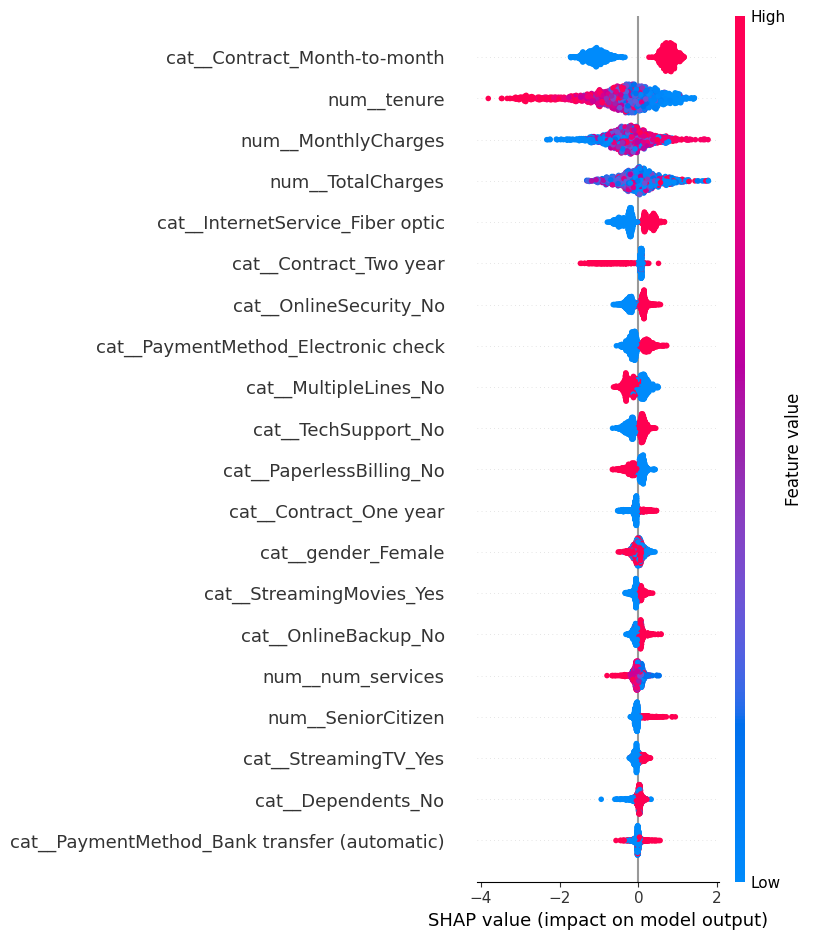

In [25]:
import shap
import numpy as np

# 1) Get preprocessor and model separately from pipeline
pre = model.named_steps['pre']     # preprocessing part
clf = model.named_steps['clf']     # XGBoost classifier

# 2) Transform test data (SHAP ko model ke he format ka data chahiye)
X_test_trans = pre.transform(X_test)
X_train_trans = pre.transform(X_train)

# 3) Extract feature names safely
# Try sklearn >=1.0 style
try:
    feature_names = pre.get_feature_names_out()
except:
    # fallback manual method
    ohe = pre.named_transformers_['cat'].named_steps['ohe']
    cat_names = ohe.get_feature_names_out(cat_cols)
    feature_names = list(num_cols) + list(cat_names)

feature_names = list(feature_names)   # convert to normal list

# 4) Make TreeExplainer for XGBoost
explainer = shap.TreeExplainer(clf)

# 5) Compute SHAP values
shap_values = explainer.shap_values(X_test_trans)

# For binary classification → class 1 (YES / churn)
shap_val = shap_values[1] if isinstance(shap_values, list) else shap_values

# 6) Final Beeswarm plot
shap.summary_plot(shap_val, X_test_trans, feature_names=feature_names)
